<a href="https://colab.research.google.com/github/Lazar186/Borisovik/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 4: Задача классификации

## **Цель занятия:**
Изучить задачу классификации, познакомиться с метриками качества, реализовать классификатор с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Отбор признаков
2. Обучение классификатора
3. Обработка "переобучения" и дисбаланс классов и как с этим жить
4. Метирки качества и что это все означает
5. Задача мультиклассовой классификации
6. Дерево принятия решений

# ⏰ Домашнее задание

- 1. Выбрать пременную для задачи бинарной классификации (назовем это x_binary, y_binary) и выбрать пременные для задачи мультиклассовой классификации (назовем это x_multi, y_multi)

p.s. если использовали произвольную пременную для binary, multiclassification - не зывбаем выбрасывать из X изначальную переменную

- 2. Решить задачу классификации с использованием кросс валидации, оценить метрики качства: accuracy, precision, recall (включая classification report).
  - 2.1. Используя опыт прошлых работ, попробуйте использовать лучшие признаки для решения задачи

- 3. Для обоих задач побороться с дисбалансом классов следующими техниками:
  - oversampling (например, SMOTE)
  - или undersampling.

Для oversampling и undersampling используйте (https://imbalanced-learn.org/)
Опишите полученный результат

Самый простой пример (желательно не использовать рандом)
```
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
```

- 4. Обучить дерево принятия решений с использованием кросс-валидации (Stratify K-fold и/или StratifyRandomShuffle)  для ```oversampling``` и ```undersampling``` (в задачи мультиклассовой классификации), оценить метрики и описать результат.



In [71]:
# x_binary - признаки, y_binary - целевая переменная для бинарной классификации
y_binary = df['is_critical_condition']
x_binary = df.drop('is_critical_condition', axis=1)


Кросс-валидация

In [77]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Загрузка данных
# df = pd.read_csv('your_data.csv')  # Замените на ваш путь к файлу, если необходимо

# 1. Для бинарной классификации
y_binary = df['is_critical_condition']  # Целевая переменная для бинарной классификации
x_binary = df.drop(['is_critical_condition'], axis=1)  # Признаки, исключая целевую переменную

# Функция для кросс-валидации и отчета по классификации
def cross_validate_and_report(x, y):
    # Применяем SMOTE для oversampling (балансировка классов)
    smote = SMOTE(random_state=42)
    x_res, y_res = smote.fit_resample(x, y)

    # Используем Stratified K-Fold для кросс-валидации
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = DecisionTreeClassifier(random_state=42)

    # Получаем точность по кросс-валидации
    cv_scores = cross_val_score(model, x_res, y_res, cv=cv, scoring='accuracy')

    # Выводим точность
    print(f'Accuracy with SMOTE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')

    # Обучаем модель на всём сбалансированном наборе данных
    model.fit(x_res, y_res)
    y_pred = model.predict(x_res)

    # Печатаем отчет по классификации
    print("\nClassification Report:")
    print(classification_report(y_res, y_pred))

# Кросс-валидация и отчет для бинарной классификации
print("Binary Classification Results:")
cross_validate_and_report(x_binary, y_binary)

Binary Classification Results:
Accuracy with SMOTE: 0.9900 ± 0.0093

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       201

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Борьба с дисбалансом классов

In [78]:
# Применяем RandomUnderSampler для undersampling
undersampler = RandomUnderSampler(random_state=42)
x_res, y_res = undersampler.fit_resample(x_binary, y_binary)
cross_validate_and_report(x_res, y_res)


Accuracy with SMOTE: 0.9852 ± 0.0181

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        69

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `

Дерево решений

In [82]:
# Пример обучения модели с кросс-валидацией
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
model = DecisionTreeClassifier(random_state=42)

# Использование StratifiedKFold для кросс-валидации
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Кросс-валидация с расчетом точности
cv_scores = cross_val_score(model, x_res, y_res, cv=cv, scoring='accuracy')
print(f'Accuracy with Decision Tree and SMOTE: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}')



Accuracy with Decision Tree and SMOTE: 0.9929 ± 0.0214


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


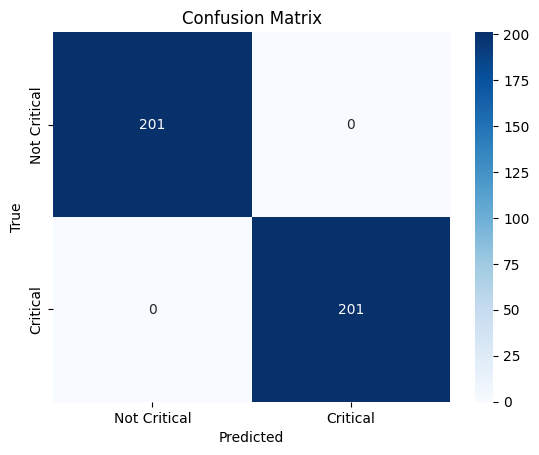

In [84]:
# Применяем SMOTE для oversampling
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_binary, y_binary)

# Обучаем модель на сбалансированном наборе данных
model = DecisionTreeClassifier(random_state=42)
model.fit(x_res, y_res)

# Получаем предсказания
y_pred = model.predict(x_res)

# Визуализация матрицы ошибок
cm = confusion_matrix(y_res, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Critical', 'Critical'], yticklabels=['Not Critical', 'Critical'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [89]:
from sklearn.model_selection import GridSearchCV

# Настройка параметров для поиска
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Обучение на данных с использованием GridSearch
grid_search.fit(x_res, y_res)

# Лучшие параметры
print("Best parameters found: ", grid_search.best_params_)

# Обучение на лучших параметрах
best_model = grid_search.best_estimator_

# Оценка модели
y_pred_best = best_model.predict(x_res)
print(classification_report(y_res, y_pred_best))


Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201
           1       1.00      1.00      1.00       201

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



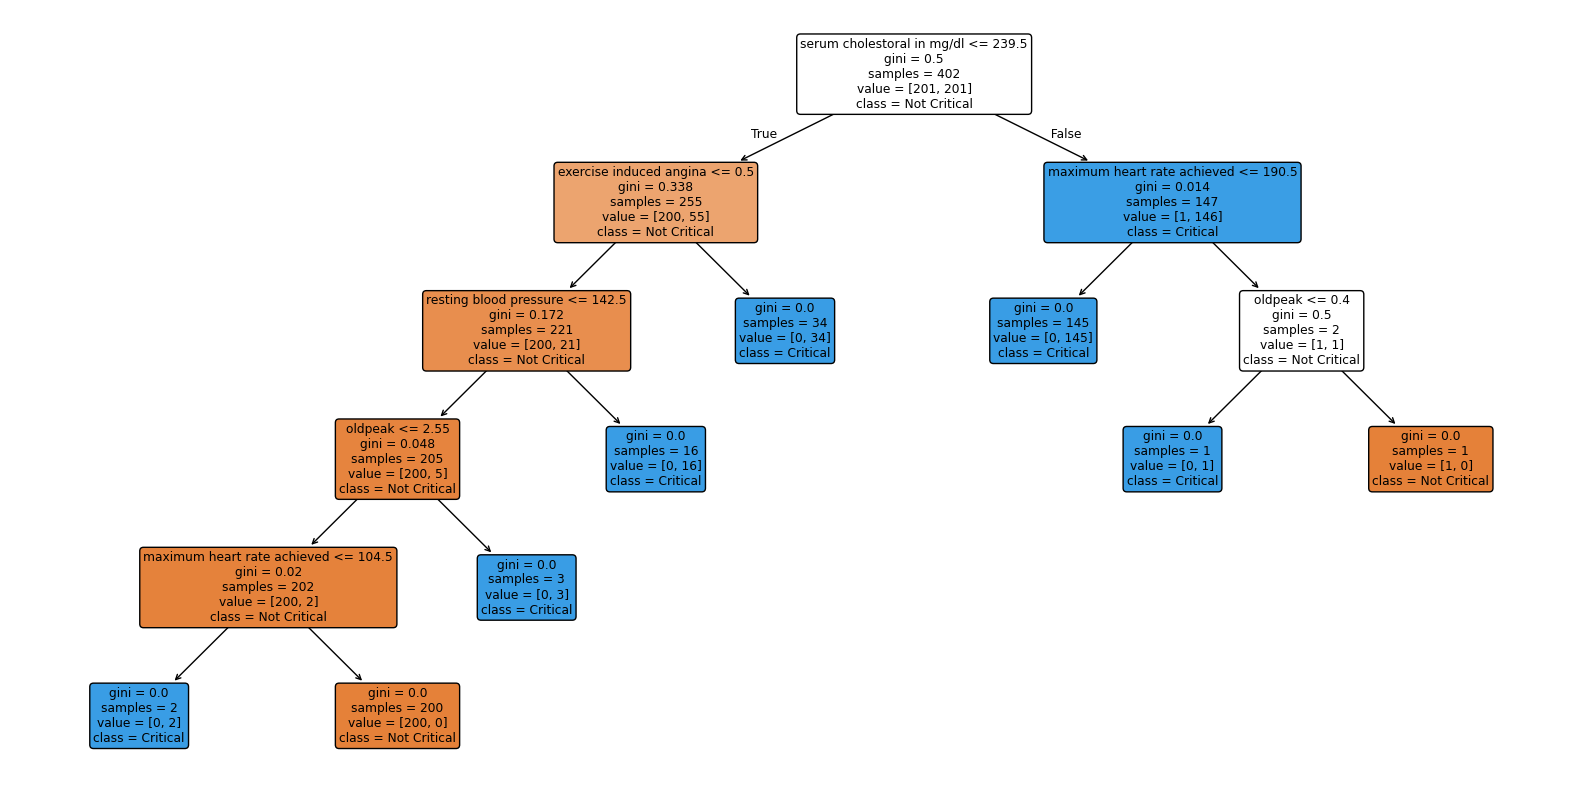

In [90]:
from sklearn.tree import plot_tree

# Визуализируем дерево решений
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=x_res.columns, class_names=['Not Critical', 'Critical'], rounded=True)
plt.show()


## 1: Загрузка библиотек и предобратка данных

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('/content/heart_disease (1).csv')

# Удаляем лишние пробелы в названиях столбцов
df.columns = df.columns.str.strip()

# Теперь можно работать с данными, например, с 'maximum heart rate achieved'
df['is_critical_condition'] = np.where(
    (df['resting blood pressure'] > 140) |
    (df['maximum heart rate achieved'] < 100) |
    (df['exercise induced angina'] == 1) |
    (df['serum cholestoral in mg/dl'] > 240) |
    (df['oldpeak'] > 2.5),
    1,  # Критическое состояние
    0   # Состояние некритическое
).astype(int)

# Проверка первых строк
print(df[['resting blood pressure',
          'maximum heart rate achieved',
          'exercise induced angina',
          'serum cholestoral in mg/dl',
          'oldpeak',
          'is_critical_condition']].head())

# Целевая переменная (критическое состояние)
Y = df['is_critical_condition']  # выбираем целевую переменную

# Переменные для проверки влияния (дропаем 'is_critical_condition' и 'Disease')
X = df.drop(['is_critical_condition', 'Disease'], axis=1)  # удаляем обе целевые переменные

# Проверка
print(X.head())
print(Y.head())

df.drop('Disease', axis=1).info()

   resting blood pressure  maximum heart rate achieved  \
0                     130                          109   
1                     115                          160   
2                     124                          141   
3                     128                          105   
4                     120                          121   

   exercise induced angina  serum cholestoral in mg/dl  oldpeak  \
0                        0                         322      2.4   
1                        0                         564      1.6   
2                        0                         261      0.3   
3                        1                         263      0.2   
4                        1                         269      0.2   

   is_critical_condition  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
   age  sex  chest pain type  resting blood pressure  \
0   70    1                4  

In [5]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


### 1.2 Проверка баланса

Проверка, насколько сбалансированы классы в нашей целевой переменной:

In [7]:
Y.value_counts()

,count
is_critical_condition,
1,201
0,69


### 1.3 Создание искусственного дисбаланса классов
Создадим новую целевую переменную y_disbalanced, где 90% классов будут 0, а 10% — 1:

In [14]:
from sklearn.utils import resample

# Объединяем X и Y для удобства
df = pd.concat([X, Y], axis=1)

# Разделяем данные по классам
majority = df[df['is_critical_condition'] == 0]
minority = df[df['is_critical_condition'] == 1]

# Уменьшаем количество экземпляров класса меньшинства
minority_downsampled = resample(
    minority,
    replace=False,
    n_samples=int(len(majority) * 0.1),  # Уменьшаем до 10% от класса большинства
    random_state=42
)

# Объединяем обратно
df_disbalanced = pd.concat([majority, minority_downsampled])

# Разделяем обратно на признаки и целевую переменную
X_disbalanced = df_disbalanced.drop('is_critical_condition', axis=1)
Y_disbalanced = df_disbalanced['is_critical_condition']

# Проверяем размер нового дисбалансированного датасета
print(f"Количество примеров в новом наборе данных: {len(df_disbalanced)}")
print(f"Распределение классов:\n{Y_disbalanced.value_counts()}")


Количество примеров в новом наборе данных: 75
Распределение классов:
is_critical_condition
0    69
1     6
Name: count, dtype: int64


Проверим новый баланс классов:

In [16]:
print(Y_disbalanced.value_counts())


is_critical_condition
0    69
1     6
Name: count, dtype: int64


###1.4 Обучаем логистическую регрессию (без доп. манипуляций) на дисбалансе

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_disbalanced, Y_disbalanced, test_size=0.3, random_state=42)

# Обучаем модель
model = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model.fit(X_train, Y_train)

# Предсказания
Y_pred = model.predict(X_test)


In [21]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        22
           1       0.00      0.00      0.00         1

    accuracy                           0.91        23
   macro avg       0.48      0.48      0.48        23
weighted avg       0.91      0.91      0.91        23



In [22]:
unique, counts = np.unique(Y_pred, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # данная ситуация называется переобучением. Модель очень хорошо обучилась на 0, настолько, что не может предсказать 1

{0: 22, 1: 1}

### 1.5 Создадим сбалансированную выборку, и попробуем сделать тоже самое

In [31]:
import pandas as pd
from sklearn.utils import resample

# Объединяем X и Y для удобства
data = pd.concat([X, Y], axis=1)

# Разделяем данные на два класса
majority = data[data['is_critical_condition'] == 0]  # Не критическое состояние
minority = data[data['is_critical_condition'] == 1]  # Критическое состояние

# Проверяем размер классов
print(f"Размеры классов до балансировки:")
print(f"Не критическое состояние (0): {len(majority)}")
print(f"Критическое состояние (1): {len(minority)}")

# Если класс большинства больше, уменьшаем его до размера класса меньшинства
if len(majority) > len(minority):
    majority_downsampled = resample(majority,
                                    replace=False,  # Без замены
                                    n_samples=len(minority),  # Уменьшаем до размера класса 1
                                    random_state=42)
    print(f"Уменьшаем класс большинства до размера: {len(minority)}")
else:
    # Если класс большинства меньше, увеличиваем его до размера класса меньшинства
    minority_upsampled = resample(minority,
                                  replace=True,  # С заменой
                                  n_samples=len(majority),  # Увеличиваем до размера класса 0
                                  random_state=42)
    print(f"Увеличиваем класс меньшинства до размера: {len(majority)}")

# Объединяем обратно, чтобы получить сбалансированный датасет
if len(majority) > len(minority):
    data_balanced = pd.concat([majority_downsampled, minority])
else:
    data_balanced = pd.concat([majority, minority_upsampled])

# Новые X и y после сбалансирования
X_balanced = data_balanced.drop('is_critical_condition', axis=1)  # Признаки
Y_balanced = data_balanced['is_critical_condition']  # Целевая переменная

# Проверка результатов: размеры классов после балансировки
print(f"Размеры классов после балансировки:")
print(f"Не критическое состояние (0): {len(majority_downsampled if len(majority) > len(minority) else majority)}")
print(f"Критическое состояние (1): {len(minority_upsampled if len(minority) > len(majority) else minority)}")

# Теперь можно использовать X_balanced и Y_balanced для обучения модели


Размеры классов до балансировки:
Не критическое состояние (0): 69
Критическое состояние (1): 201
Увеличиваем класс меньшинства до размера: 69
Размеры классов после балансировки:
Не критическое состояние (0): 69
Критическое состояние (1): 69


In [32]:
print(Y_balanced.value_counts())


is_critical_condition
0    69
1    69
Name: count, dtype: int64


In [34]:
# Разделяем данные
X_train_bal, X_test_bal, Y_train_bal, Y_test_bal = train_test_split(X_balanced, Y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, Y_train_bal)

# Предсказания
Y_pred_bal = model_balanced.predict(X_test_bal)


In [35]:
print("Accuracy:", accuracy_score(Y_test_bal, Y_pred_bal))
print("\nClassification Report:\n", classification_report(Y_test_bal, Y_pred_bal))


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.78      0.90      0.84        20

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



In [36]:
unique, counts = np.unique(Y_pred_bal, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # Текущая модель показывает неплохие результаты. Попробуем улучшить

{0: 19, 1: 23}

In [37]:
# Выбираем числовые признаки
numeric_features = X_balanced.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_balanced[numeric_features] = scaler.fit_transform(X_balanced[numeric_features])


In [39]:
# Разделяем данные
X_train_bal, X_test_bal, Y_train_bal, Y_test_bal = train_test_split(X_balanced, Y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, Y_train_bal)

# Предсказания
Y_pred_bal = model_balanced.predict(X_test_bal)


In [40]:
print("Accuracy:", accuracy_score(Y_test_bal, Y_pred_bal))
print("\nClassification Report:\n", classification_report(Y_test_bal, Y_pred_bal)) # Дополнительно получили 1.57% точности, отлично!


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.78      0.90      0.84        20

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



In [41]:
unique, counts = np.unique(Y_pred_bal, return_counts=True) # получаем уникальные значения и их количество в предсказанных данных

dict(zip(unique, counts)) # Текущая модель показывает неплохие результаты. Попробуем улучшить

{0: 19, 1: 23}

# 2 Метрики качества классификаци

Приведу разбор метрик классификации с аналогиями, используя пример с яблоками разных цветов 🍏🍎. Представьте, что задача — правильно определить, какие яблоки зеленые, красные или желтые. Каждая метрика поможет оценить, насколько хорошо мы справляемся с этой задачей.

То есть, есть Y, который состоит из яблок разных цветов
- 1 🍏 - класс 0
- 2 🍎 - класс 1

Прежде чем перейти к метрикам, важно понять, что означают обозначения TP, FP, TN, FN. Они представляют разные типы предсказаний:

- TP (True Positive) — правильно предсказанные положительные примеры (например, если мы верно определили 🍏 как зеленое яблоко).

- FP (False Positive) — ошибочно предсказанные положительные примеры (например, если мы предсказали 🍎 как 🍏).

- TN (True Negative) — правильно предсказанные отрицательные примеры (например, если мы верно определили, что 🍎 не является 🍏).

- FN (False Negative) — ошибочно предсказанные отрицательные примеры (например, если мы не определили 🍏 как зеленое яблоко, хотя оно таким является).

### 2.1 Точность (Accuracy)


Формула:
Accuracy = (TP + TN) / (TP + FP + TN + FN)

Пример:
У нас 10 яблок: 4 🍏, 3 🍎, 3 🍊. Алгоритм правильно предсказал 7 из них.
Accuracy = 7 / 10 = 0.7 или 70%

**Когда использовать**:
Точность полезна, когда классы сбалансированы (примерно равное количество примеров каждого типа). В случаях сильного дисбаланса классов, точность может стать вводящей в заблуждение, так как она не учитывает, что какой-то класс может преобладать.

### 2.2 Precision и Recall

- Precision (Точность) — процент верных положительных предсказаний среди всех предсказанных положительных.
- Recall (Полнота) — процент верных положительных предсказаний среди всех фактических положительных случаев.

Формулы:
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)

Пример:
Мы пытаемся предсказать 🍏 (зеленое яблоко).

У нас 5 🍏, из них 4 правильно определены как 🍏, но 1 🍎 ошибочно классифицировано как 🍏.
- Precision для 🍏: 4 / (4 + 1) = 0.8 или 80%
- Recall для 🍏: 4 / (4 + 1) = 0.8 или 80%

**Когда использовать**:

Precision важен, когда критично избежать ложных положительных предсказаний (например, если ошибочно отнесенные яблоки могут повлиять на качество товара).
Recall важен, когда критично найти все положительные примеры (например, если требуется найти все 🍏 в ящике, чтобы их не упустить).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" height=800 />

### 2.3. F1-score


F1-score — это гармоническое среднее между Precision и Recall, что позволяет учитывать как ложноположительные, так и ложноотрицательные предсказания.

Формула:
- F1 = 2 * (Precision * Recall) / (Precision + Recall)

Пример:

Если Precision = 80% и Recall = 80%, то:
F1 = 2 * (0.8 * 0.8) / (0.8 + 0.8) = 0.8 или 80%

**Когда использовать**:
F1-score полезен, когда требуется балансировать между Precision и Recall, особенно при наличии дисбаланса классов. Он важен, когда критично учитывать и ложные положительные, и ложные отрицательные предсказания.

### 2.4. ROC-AUC
ROC-кривая показывает, как меняется соотношение между True Positive Rate (доля правильно предсказанных положительных) и False Positive Rate (доля ошибочно предсказанных положительных) при разных порогах. AUC (площадь под ROC-кривой) измеряет общую способность модели различать классы.

Когда использовать:
ROC-AUC используется для оценки моделей, когда требуется понять способность модели различать классы в задаче классификации. Чем ближе AUC к 1, тем лучше модель. AUC особенно полезен, когда классы несбалансированы, так как он показывает общую производительность модели при разных порогах.

ROC-кривая (Receiver Operating Characteristic) отображает зависимость между:

- True Positive Rate (TPR) — это доля правильно предсказанных положительных примеров среди всех фактических положительных примеров.
Формула: TPR = TP / (TP + FN)

- False Positive Rate (FPR) — это доля ошибочно предсказанных положительных примеров среди всех фактических отрицательных примеров.
Формула: FPR = FP / (FP + TN)

На графике ROC:

- Ось Y представляет TPR (доля верных положительных предсказаний).
- Ось X представляет FPR (доля ошибочных положительных предсказаний).

AUC (Area Under Curve) — это площадь под ROC-кривой. Она измеряет способность модели различать классы: чем больше площадь (чем ближе AUC к 1), тем лучше модель справляется с разделением классов.

- AUC = 1 — идеальная модель: она всегда отличает положительный класс от отрицательного.
- AUC = 0.5 — случайное угадывание, модель не способна различать классы лучше, чем просто случайный выбор.

[Подробнее](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ru)

### 2.5 Classification Report

### Classification Report (на примере 🍏 и 🍎):

|               | Precision | Recall | F1-score | Support |
|---------------|-----------|--------|----------|---------|
| **0 (🍏)**    | 0.78      | 0.73   | 0.75     | 390     |
| **1 (🍎)**    | 0.74      | 0.79   | 0.76     | 377     |
| **Accuracy**  |           |        | 0.76     | 767     |
| **Macro avg** | 0.76      | 0.76   | 0.76     | 767     |
| **Weighted avg** | 0.76   | 0.76   | 0.76     | 767     |

---

1. **Precision**:
   - **🍏 (0.78)** — 78% предсказанных 🍏 действительно 🍏.
   - **🍎 (0.74)** — 74% предсказанных 🍎 действительно 🍎.

2. **Recall**:
   - **🍏 (0.73)** — модель нашла 73% всех 🍏.
   - **🍎 (0.79)** — модель нашла 79% всех 🍎.

3. **F1-score**:
   - **🍏 (0.75)**, **🍎 (0.76)** — баланс Precision и Recall для каждого класса.

4. **Accuracy** = 0.76 — 76% всех предсказаний правильны.


### 2.6 А теперь до делу (вернемся к прошлым примерам и проанализуем нашу ситуацию)

In [42]:
# Разделяем данные
X_train_bal, X_test_bal, Y_train_bal, Y_test_bal = train_test_split(X_balanced, Y_balanced, test_size=0.3, random_state=42)

# Обучаем модель
model_balanced = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
model_balanced.fit(X_train_bal, Y_train_bal)

# Предсказания
Y_pred_bal = model_balanced.predict(X_test_bal)


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Вычисляем матрицу ошибок (TP, FP, TN, FN)
conf_matrix = confusion_matrix(Y_test_bal, Y_pred_bal)
tn, fp, fn, tp = conf_matrix.ravel()

# Рассчитываем метрики
accuracy = accuracy_score(Y_test_bal, Y_pred_bal)
precision = precision_score(Y_test_bal, Y_pred_bal)
recall = recall_score(Y_test_bal, Y_pred_bal)
f1 = f1_score(Y_test_bal, Y_pred_bal)
roc_auc = roc_auc_score(Y_test_bal, Y_pred_bal)

# Генерируем classification_report
class_report = classification_report(Y_test_bal, Y_pred_bal, output_dict=True)

# Формируем результаты для наглядного вывода
results = {
    "True Negatives (TN)": tn,
    "False Positives (FP)": fp,
    "False Negatives (FN)": fn,
    "True Positives (TP)": tp,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "ROC-AUC": roc_auc,
}

# Округляем все значения в словаре до двух знаков после запятой и возвращаем в виде dict.items()
rounded_items = {k: round(v, 2) for k, v in results.items()}


⏰ оцениваем метрики и объясняем результат (без ChatGPT)

Precision - 89% предсказанных как 0, действительно 0,
          а 78% предсказанных как 1, действительно 1

Recall - 77% для 0 и 90% для 1

F1 Score (0) = 2 * ((TP0/(TP0+FP0)) * (TP0/(TP0+FN0)))
                    Precison          Recall
                    / ((TP0/(TP0+FP0)) + (TP0/(TP0+FN0))) ==> при F1(0) = 83% хороший баланс между Recall и Precision

для F1(1) = 84%, также хороший баланс

Accuracy = 83% (доля правильно классифицированных объектов)

Модель демонстрирует хорошее качество классификации, особенно для класса 1 (критическое состояние)

Для класса 0 модель немного хуже по полноте (Recall), что может быть связано с тем, что у нее есть ложные отрицательные предсказания

F1-метрики близки между классами, что указывает на сбалансированное качество работы модели для обоих классов

In [46]:
print(classification_report(Y_test_bal, Y_pred_bal))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.78      0.90      0.84        20

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



In [47]:
conf_matrix # Матрица
# TN FP
# FN TP

array([[17,  5],
       [ 2, 18]])

In [48]:
rounded_items

{'True Negatives (TN)': 17,
 'False Positives (FP)': 5,
 'False Negatives (FN)': 2,
 'True Positives (TP)': 18,
 'Accuracy': 0.83,
 'Precision': 0.78,
 'Recall': 0.9,
 'F1-score': 0.84,
 'ROC-AUC': 0.84}

# 3. Задача мультиклассовой классфикации

Задача мультиклассовой классификации - когда мы хотим предсказать сразу несколько классов

В качестве y - используем quality

In [61]:
# Объединяем X и Y для удобства
data = pd.concat([X, Y], axis=1)

# Разделяем данные на два класса
majority = data[data['is_critical_condition'] == 0]  # Не критическое состояние
minority = data[data['is_critical_condition'] == 1]  # Критическое состояние

# Проверяем размер классов
print(f"Размеры классов до балансировки:")
print(f"Не критическое состояние (0): {len(majority)}")
print(f"Критическое состояние (1): {len(minority)}")


Размеры классов до балансировки:
Не критическое состояние (0): 69
Критическое состояние (1): 201


In [59]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X = pd.get_dummies(X, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [60]:
X

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


## 3.1 Алгоритм дерева принятия решений

Алгоритм дерева принятия решений (Decision Tree) — это один из методов машинного обучения, который используется для решения задач классификации и регрессии. Дерево решений представляет собой структуру, в которой каждый внутренний узел соответствует некоторому признаку, а каждая ветвь — определенному значению этого признака. Листовые узлы представляют собой классы или значения, которые необходимо предсказать.

### Как работает дерево решений:

1. **Корневой узел**: Это первый узел в дереве, который соответствует самому информативному признаку. Признак выбирается на основе критериев, например по индексу Gini (различие по y, чем ближе к 1, тем разнороднее классы y в узле)

2. **Разбиение данных**: На каждом шаге дерево разбивает данные на подмножества в соответствии с выбранным признаком. Эти разбиения происходят рекурсивно, пока не будет достигнут некоторый критерий остановки (например, максимальная глубина дерева, минимальное количество данных в листе).

3. **Листовые узлы**: Листовые узлы содержат финальные предсказания. В случае задачи классификации это будет класс, а в случае регрессии — числовое значение.

4. **Критерии остановки**: Дерево останавливает разбиение, если достигается один из критериев остановки — например, если достигнута максимальная глубина дерева или в узле осталось меньше минимального числа данных для разбиения.

### Преимущества:
- Простота визуализации и интерпретации.
- Может использоваться как для классификации, так и для регрессии.
- Не требует предварительной нормализации данных.

### Недостатки:
- Может переобучаться (overfitting), если не ограничить глубину дерева.
- Чувствительно к небольшим изменениям в данных.

In [62]:
from sklearn.tree import DecisionTreeClassifier
# Разделяем данные
X_train_multi, X_test_multi,  Y_train_multi, Y_test_multi = train_test_split(X, Y, test_size=0.3, random_state=42)

# Обучаем модель
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)
tree_model.fit(X_train_multi, Y_train_multi)

# Предсказания
Y_pred_multi = tree_model.predict(X_test_multi)

In [63]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n", classification_report(Y_test_multi, Y_pred_multi))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.98      1.00      0.99        55

    accuracy                           0.99        81
   macro avg       0.99      0.98      0.99        81
weighted avg       0.99      0.99      0.99        81



Про *macro avg* и *weighted avg*.:

1. **Macro average (macro avg)**:
   - Этот показатель вычисляется как среднее арифметическое по каждому классу для всех метрик (precision, recall и f1-score). То есть сначала вычисляются precision, recall и f1-score для каждого класса, а затем они усредняются без учёта того, сколько примеров было в каждом классе. Этот показатель полезен, когда интересует равное внимание к каждому классу, независимо от его частоты в данных.
   - *Проблема*: Если классы несбалансированы (т.е. некоторые классы имеют намного больше примеров, чем другие), то этот показатель может быть искажен в сторону меньших классов.

2. **Weighted average (weighted avg)**:
   - Этот показатель тоже вычисляется на основе метрик каждого класса (precision, recall и f1-score), но с учетом количества примеров (support) в каждом классе. То есть каждый класс вносит свой вклад в среднее значение пропорционально его количеству примеров в данных.
   - *Преимущество*: В отличие от macro avg, weighted avg корректнее отражает общую производительность модели на несбалансированных данных, так как учитывает частоту каждого класса.

Проще говоря:
- **Macro avg** показывает усреднённое качество модели по всем классам, не обращая внимания на то, сколько примеров в каждом классе.
- **Weighted avg** взвешивает качество по количеству примеров каждого класса, что делает его более устойчивым к несбалансированным классам.

In [65]:
accuracy_score(Y_test_multi, Y_pred_multi)


0.9876543209876543

In [66]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test_multi, Y_pred_multi) # ну такое


0.9807692307692308

### Важность признаков

Признаки, которые внесли наибольший вклад в модель

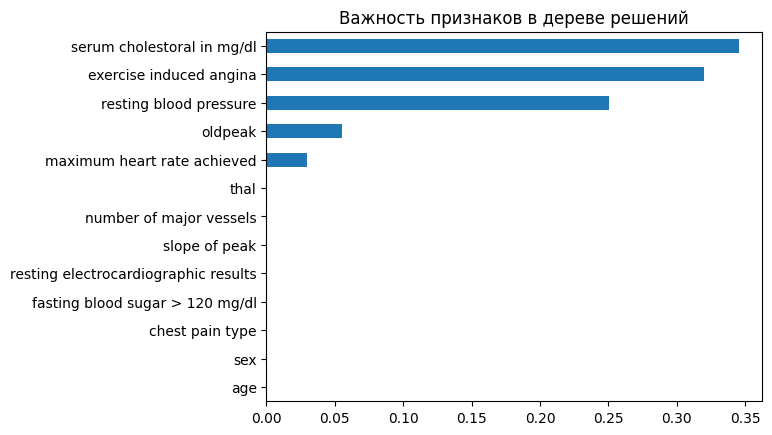

In [67]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Важность признаков в дереве решений')
plt.show()


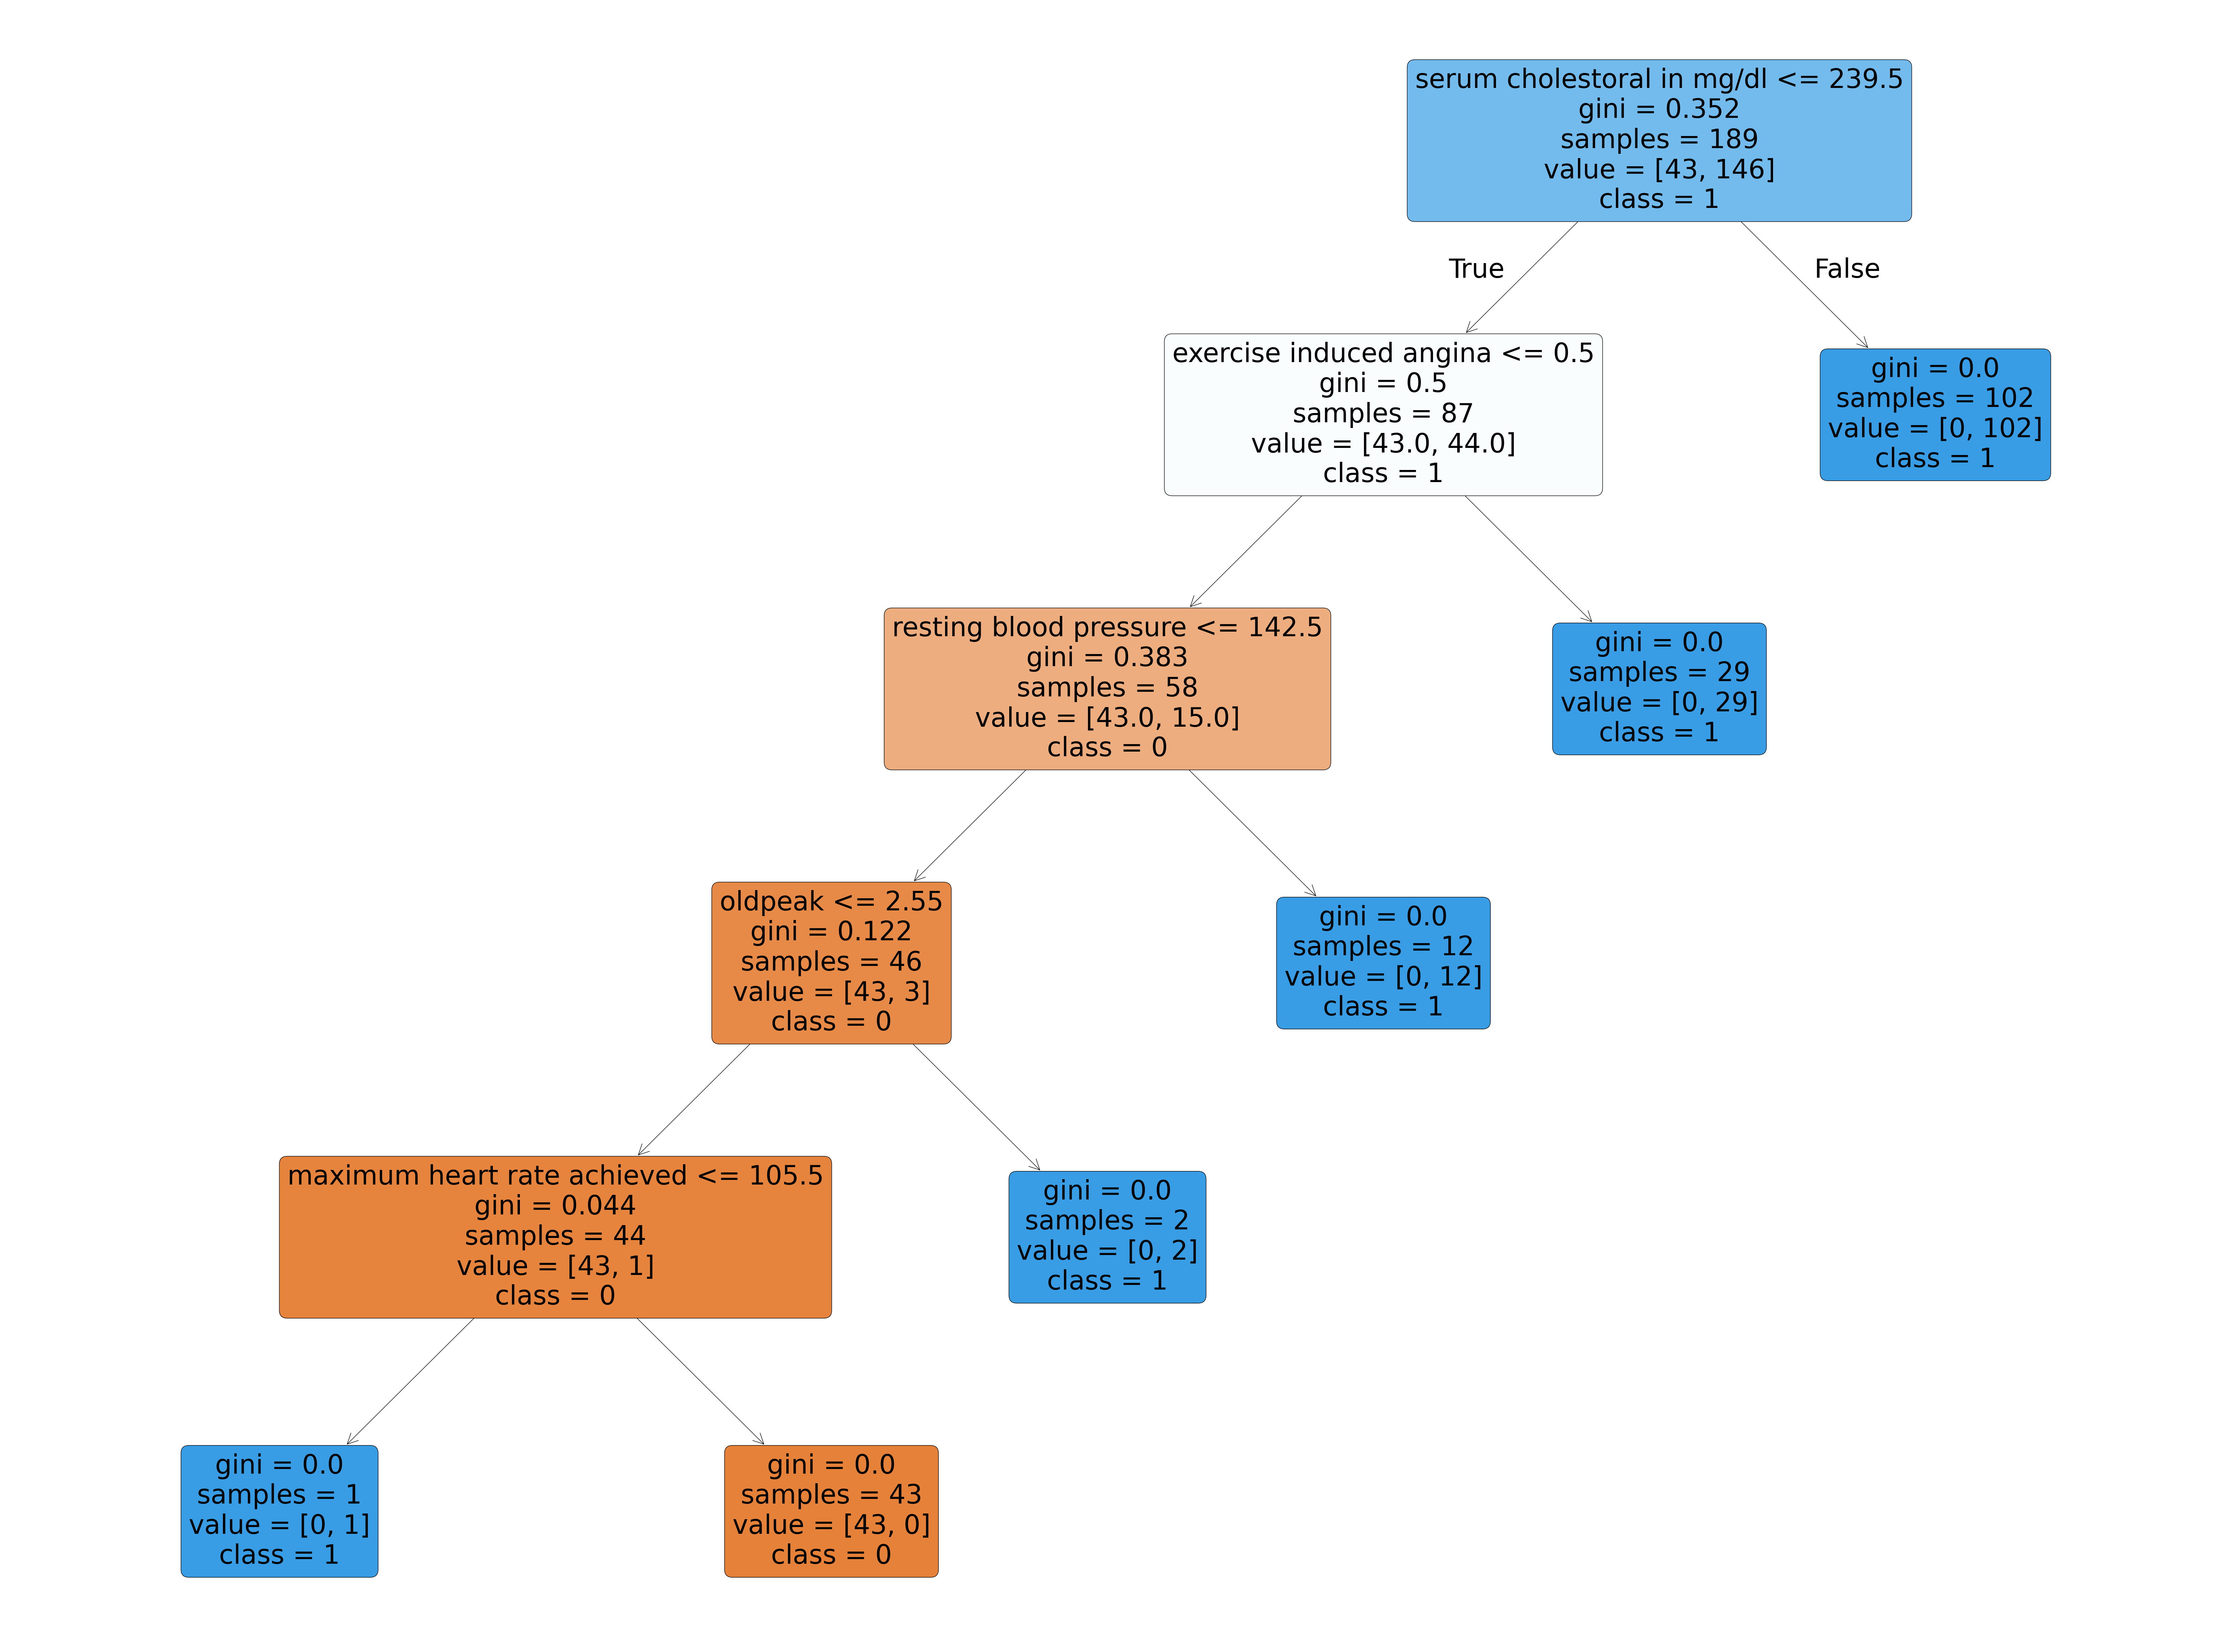

In [69]:
from sklearn.tree import plot_tree
# Визуализируем дерево решений
plt.figure(figsize=(80, 60))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(item) for item in sorted(Y.unique())], filled=True, rounded=True)
plt.show()
